# Title: Movie Genre Predictor Analysis 

## Subject : Romance or Thriller? Movie Genre Prediction from Audio, Visual, and Text Features!

## Course Code : COMP 90049


### Import Libraries

In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
import numpy as np
import matplotlib.pyplot as plt

### Prepping raw data

In [2]:
train_features = pd.read_csv(r"C:\Users\cyeeh\OneDrive\Masters\2020 Sem 1\Intro to Machine Learning\ML Assignment 2\NEW_data\data\train_features.tsv",sep='\t')
X_valid = pd.read_csv(r"C:\Users\cyeeh\OneDrive\Masters\2020 Sem 1\Intro to Machine Learning\ML Assignment 2\NEW_data\data\valid_features.tsv",sep='\t')

train_labels = pd.read_csv(r"C:\Users\cyeeh\OneDrive\Masters\2020 Sem 1\Intro to Machine Learning\ML Assignment 2\NEW_data\data\train_labels.tsv",sep="\t")
y_valid = pd.read_csv(r"C:\Users\cyeeh\OneDrive\Masters\2020 Sem 1\Intro to Machine Learning\ML Assignment 2\NEW_data\data\valid_labels.tsv",sep="\t")

valid_features = X_valid
X_train = train_features
y_train = train_labels

y_train_genre_only = y_train['genres'].values
y_valid_genre_only = y_valid['genres'].values

### Determine the distribution of target values in our training set for analysis

<BarContainer object of 18 artists>

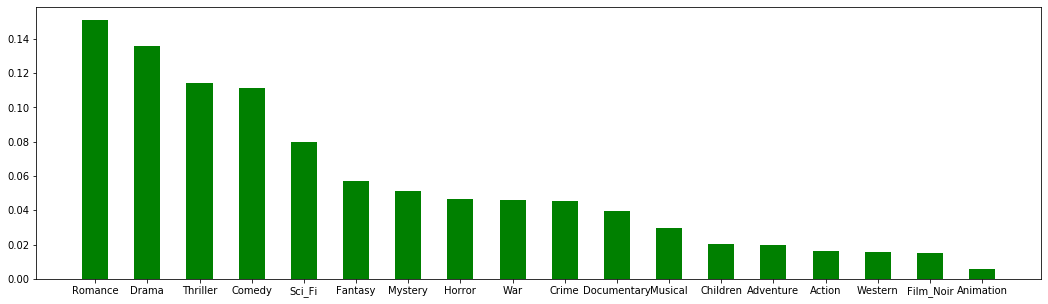

In [3]:

ellen_de_genres = {}
for genre in y_train_genre_only:
    if genre not in ellen_de_genres:
        ellen_de_genres[genre] = 1
    else:
        ellen_de_genres[genre] += 1
        
ellen_de_genres = {k: v for k, v in sorted(ellen_de_genres.items(), key=lambda item: item[1], reverse = True)}
ellen_de_genres = {k: v / total for total in (sum(ellen_de_genres.values()),) for k, v in ellen_de_genres.items()}


plt.figure(figsize = (18,5))
plt.bar(ellen_de_genres.keys(), ellen_de_genres.values(), width = .5, color = 'g')

### Baseline Model : Zero-R 

In [4]:
# Implement a baseline model - Zero-R
#most frequent genre for the true training label is Romance = 791
# Expect a training accuracy of 791/5240 = 15%
print('Zero R baseline accuracies')
print('--------------------------')

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train_genre_only)
predicted_train_genre = dummy_clf.predict(X_train)
print('Baseline Training accuracy:',dummy_clf.score(X_train,y_train_genre_only))

#Expect a validation accuracy of 17%
dummy_clf.fit(X_valid,y_valid_genre_only)
predicted_valid_genre = dummy_clf.predict(X_valid)
print('Baseline Validation accuracy:',dummy_clf.score(X_valid,y_valid_genre_only))




Zero R baseline accuracies
--------------------------
Baseline Training accuracy: 0.15095419847328245
Baseline Validation accuracy: 0.1705685618729097


### Feature Selection Functions with Model Training Functions for Textual Features only

In [5]:
def NBmodel_with_countvectorizer(X_train_MNB, X_valid_MNB, y_train_genre_only, y_valid_genre_only):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    v = CountVectorizer()
    
    train_tag_column = X_train_MNB.pop('tag')
    train_tag_column = train_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_train = v.transform(train_tag_column)
    df1 = pd.DataFrame(transformed_tag_train.toarray(), columns = v.get_feature_names())
    X_train_MNB = pd.concat([X_train_MNB, df1], axis = 1)

    train_title_column = X_train_MNB.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_train = v.transform(train_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_train.toarray(), columns = v.get_feature_names())
    X_train_MNB = pd.concat([X_train_MNB, df1], axis = 1)

    valid_tag_column = X_valid_MNB.pop('tag')
    valid_tag_column = valid_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_valid = v.transform(valid_tag_column)
    df1 = pd.DataFrame(transformed_tag_valid.toarray(), columns = v.get_feature_names())
    X_valid_MNB = pd.concat([X_valid_MNB, df1], axis = 1)

    valid_title_column = X_valid_MNB.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_valid = v.transform(valid_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_valid.toarray(), columns = v.get_feature_names())
    X_valid_MNB = pd.concat([X_valid_MNB, df1], axis = 1)

    from sklearn.naive_bayes import MultinomialNB
    from sklearn import metrics
    X_train_NB = X_train_MNB
    X_valid_NB = X_valid_MNB
    y_train_genre_only_NB = y_train_genre_only
    y_valid_genre_only_NB = y_valid_genre_only
    mlt = MultinomialNB()
    mlt.fit(X_train_NB, y_train_genre_only_NB)
    y_valid_pred_genre_NB = mlt.predict(X_valid_NB)
    y_train_pred_genre_NB = mlt.predict(X_train_NB)
    print("Performing NB without audio and visual based features under CountVectorizer")
    print("---------------------------------------------------------------------------")
    print("Validation Accuracy for MNB:",metrics.accuracy_score(y_valid_genre_only_NB, y_valid_pred_genre_NB))
    print("Training Accuracy for MNB:",metrics.accuracy_score(y_train_genre_only_NB, y_train_pred_genre_NB))
    return 

In [6]:
def NBmodel_with_tfidfvectorizer(X_train_MNB, X_valid_MNB, y_train_genre_only, y_valid_genre_only):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    v = TfidfVectorizer()
    
    train_tag_column = X_train_MNB.pop('tag')
    train_tag_column = train_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_train = v.transform(train_tag_column)
    df1 = pd.DataFrame(transformed_tag_train.toarray(), columns = v.get_feature_names())
    X_train_MNB = pd.concat([X_train_MNB, df1], axis = 1)

    train_title_column = X_train_MNB.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_train = v.transform(train_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_train.toarray(), columns = v.get_feature_names())
    X_train_MNB = pd.concat([X_train_MNB, df1], axis = 1)

    valid_tag_column = X_valid_MNB.pop('tag')
    valid_tag_column = valid_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_valid = v.transform(valid_tag_column)
    df1 = pd.DataFrame(transformed_tag_valid.toarray(), columns = v.get_feature_names())
    X_valid_MNB = pd.concat([X_valid_MNB, df1], axis = 1)

    valid_title_column = X_valid_MNB.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_valid = v.transform(valid_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_valid.toarray(), columns = v.get_feature_names())
    X_valid_MNB = pd.concat([X_valid_MNB, df1], axis = 1)

    from sklearn.naive_bayes import MultinomialNB
    from sklearn import metrics
    X_train_NB = X_train_MNB
    X_valid_NB = X_valid_MNB
    y_train_genre_only_NB = y_train_genre_only
    y_valid_genre_only_NB = y_valid_genre_only
    mlt = MultinomialNB()
    mlt.fit(X_train_NB, y_train_genre_only_NB)
    y_valid_pred_genre_NB = mlt.predict(X_valid_NB)
    y_train_pred_genre_NB = mlt.predict(X_train_NB)
    print("Performing NB without audio and visual based features under TfidfVectorizer")
    print("---------------------------------------------------------------------------")
    print("Validation Accuracy for MNB:",metrics.accuracy_score(y_valid_genre_only_NB, y_valid_pred_genre_NB))
    print("Training Accuracy for MNB:",metrics.accuracy_score(y_train_genre_only_NB, y_train_pred_genre_NB))
    
    from sklearn.metrics import classification_report
    report_NB = classification_report(y_valid_genre_only_NB, y_valid_pred_genre_NB)
    print('\n')
    print(report_NB)
    
    return 

In [7]:
def SLFNmodel_with_countvectorizer(X_train_NN, X_valid_NN, y_train_genre_only_NN, y_valid_genre_only_NN):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    v = CountVectorizer()
    
    train_tag_column = X_train_NN.pop('tag')
    train_tag_column = train_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_train = v.transform(train_tag_column)
    df1 = pd.DataFrame(transformed_tag_train.toarray(), columns = v.get_feature_names())
    X_train_NN = pd.concat([X_train_NN, df1], axis = 1)

    train_title_column = X_train_NN.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_train = v.transform(train_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_train.toarray(), columns = v.get_feature_names())
    X_train_NN = pd.concat([X_train_NN, df1], axis = 1)

    valid_tag_column = X_valid_NN.pop('tag')
    valid_tag_column = valid_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_valid = v.transform(valid_tag_column)
    df1 = pd.DataFrame(transformed_tag_valid.toarray(), columns = v.get_feature_names())
    X_valid_NN = pd.concat([X_valid_NN, df1], axis = 1)

    valid_title_column = X_valid_NN.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_valid = v.transform(valid_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_valid.toarray(), columns = v.get_feature_names())
    X_valid_NN = pd.concat([X_valid_NN, df1], axis = 1)
    
    #normalize data using z-score normalization standardscaler
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X_train_NN_norma = ss.fit_transform(X_train_NN)
    X_valid_NN_norma = ss.transform(X_valid_NN)

    import tensorflow.keras as keras
    from sklearn.preprocessing import LabelEncoder
    import tensorflow as tf

    #first integer-encode our data before one hot encoding using keras

    label_encoder = LabelEncoder()
    y_train_genre_only_NN_int = label_encoder.fit_transform(y_train_genre_only_NN)
    y_valid_genre_only_NN_int = label_encoder.transform(y_valid_genre_only_NN)

    #set the random seed for numpy and tensorflow to ensure reproduceability

    np.random.seed(111)
    tf.random.set_seed(111)

    #convert our class labels using a one hot encoder
    y_train_genre_only_NN_onehot = keras.utils.to_categorical(y_train_genre_only_NN_int)
    
    #implement our neural network
    import math
    

    #determine the number of nodes in the input layer, output layer and hidden layer
    feature_count = X_train_NN_norma.shape[1]
    label_count = y_train_genre_only_NN_onehot.shape[1]

    #calculate the number of nodes in the hidden layer using the formula below
    train_instance_count = X_train_NN_norma.shape[0]
    alpha = 2
    hidden_node_count = math.floor((feature_count + label_count)/2)  



    #initialize model
    model = keras.models.Sequential()

    #add hidden layer
    model.add(keras.layers.Dense(
        units = 50,
        input_dim = feature_count,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid') 
    )



    # add output layer
    model.add(
        keras.layers.Dense(
            units = label_count,
            kernel_initializer='glorot_uniform',
            bias_initializer='zeros',
            activation='softmax')
        )


    # define SGD optimizer
    sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=0.9
    )

    # compile model
    model.compile(
        optimizer=sgd_optimizer,
        loss='categorical_crossentropy',
        metrics = ['accuracy']
    )

    #train model
    history = model.fit(
        X_train_NN_norma, y_train_genre_only_NN_onehot,
        batch_size=32, epochs=20,
        verbose=0, validation_split=0.1
    )

    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    
    print("Performing NN without audio and visual based features under CountFVectorizer")
    print("------------------------------------------------------------------------------")
    #evaluate training accuracy for NN
    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    #reconvert our integer encoded label into their respective categories
    y_train_pred_genre_NN = label_encoder.inverse_transform(y_train_pred_genre_NN_int)
    correct_preds = np.sum(y_train_genre_only_NN == y_train_pred_genre_NN, axis=0)
    train_acc = correct_preds / y_train_genre_only_NN.shape[0]

    print(f'Training accuracy for NN: {(train_acc * 100):.2f}')


    #evaluate validation accuracy for NN
    y_valid_pred_genre_NN_int = model.predict_classes(X_valid_NN_norma, verbose=0)
    y_valid_pred_genre_NN = label_encoder.inverse_transform(y_valid_pred_genre_NN_int)
    correct_preds = np.sum(y_valid_genre_only_NN == y_valid_pred_genre_NN, axis=0)
    valid_acc = correct_preds / y_valid_genre_only_NN.shape[0]

    print(f'Validation accuracy for NN: {(valid_acc * 100):.2f}')
    
    return

In [8]:
def SLFNmodel_with_tfidfvectorizer(X_train_NN, X_valid_NN, y_train_genre_only_NN, y_valid_genre_only_NN):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    v = TfidfVectorizer()
    
    train_tag_column = X_train_NN.pop('tag')
    train_tag_column = train_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_train = v.transform(train_tag_column)
    df1 = pd.DataFrame(transformed_tag_train.toarray(), columns = v.get_feature_names())
    X_train_NN = pd.concat([X_train_NN, df1], axis = 1)

    train_title_column = X_train_NN.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_train = v.transform(train_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_train.toarray(), columns = v.get_feature_names())
    X_train_NN = pd.concat([X_train_NN, df1], axis = 1)

    valid_tag_column = X_valid_NN.pop('tag')
    valid_tag_column = valid_tag_column.map(lambda x:x.replace(','," "))
    v.fit(train_tag_column)
    transformed_tag_valid = v.transform(valid_tag_column)
    df1 = pd.DataFrame(transformed_tag_valid.toarray(), columns = v.get_feature_names())
    X_valid_NN = pd.concat([X_valid_NN, df1], axis = 1)

    valid_title_column = X_valid_NN.pop('title')
    v.fit(train_title_column.values.astype('U'))
    transformed_title_valid = v.transform(valid_title_column.values.astype('U'))
    df1 = pd.DataFrame(transformed_title_valid.toarray(), columns = v.get_feature_names())
    X_valid_NN = pd.concat([X_valid_NN, df1], axis = 1)
    
    #normalize data using z-score normalization standardscaler
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X_train_NN_norma = ss.fit_transform(X_train_NN)
    X_valid_NN_norma = ss.transform(X_valid_NN)

    import tensorflow.keras as keras
    from sklearn.preprocessing import LabelEncoder
    import tensorflow as tf

    #first integer-encode our data before one hot encoding using keras

    label_encoder = LabelEncoder()
    y_train_genre_only_NN_int = label_encoder.fit_transform(y_train_genre_only_NN)
    y_valid_genre_only_NN_int = label_encoder.transform(y_valid_genre_only_NN)

    #set the random seed for numpy and tensorflow to ensure reproduceability

    np.random.seed(111)
    tf.random.set_seed(111)

    #convert our class labels using a one hot encoder
    y_train_genre_only_NN_onehot = keras.utils.to_categorical(y_train_genre_only_NN_int)
    
    #implement our neural network
    import math
    

    #determine the number of nodes in the input layer, output layer and hidden layer
    feature_count = X_train_NN_norma.shape[1]
    label_count = y_train_genre_only_NN_onehot.shape[1]

    #calculate the number of nodes in the hidden layer using the formula below
    train_instance_count = X_train_NN_norma.shape[0]
    alpha = 2
    hidden_node_count = math.floor((feature_count + label_count)/2)  



    #initialize model
    model = keras.models.Sequential()

    #add hidden layer
    model.add(keras.layers.Dense(
        units = 50,
        input_dim = feature_count,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid') 
    )



    # add output layer
    model.add(
        keras.layers.Dense(
            units = label_count,
            kernel_initializer='glorot_uniform',
            bias_initializer='zeros',
            activation='softmax')
        )


    # define SGD optimizer
    sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=0.9
    )

    # compile model
    model.compile(
        optimizer=sgd_optimizer,
        loss='categorical_crossentropy',
        metrics = ['accuracy']
    )

    #train model
    history = model.fit(
        X_train_NN_norma, y_train_genre_only_NN_onehot,
        batch_size=32, epochs=20,
        verbose=0, validation_split=0.1
    )

    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    
    print("Performing NN without audio and visual based features under TfidfVectorizer")
    print("------------------------------------------------------------------------------")
    #evaluate training accuracy for NN
    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    #reconvert our integer encoded label into their respective categories
    y_train_pred_genre_NN = label_encoder.inverse_transform(y_train_pred_genre_NN_int)
    correct_preds = np.sum(y_train_genre_only_NN == y_train_pred_genre_NN, axis=0)
    train_acc = correct_preds / y_train_genre_only_NN.shape[0]

    print(f'Training accuracy for NN: {(train_acc * 100):.2f}')


    #evaluate validation accuracy for NN
    y_valid_pred_genre_NN_int = model.predict_classes(X_valid_NN_norma, verbose=0)
    y_valid_pred_genre_NN = label_encoder.inverse_transform(y_valid_pred_genre_NN_int)
    correct_preds = np.sum(y_valid_genre_only_NN == y_valid_pred_genre_NN, axis=0)
    valid_acc = correct_preds / y_valid_genre_only_NN.shape[0]

    print(f'Validation accuracy for NN: {(valid_acc * 100):.2f}')
    
    from sklearn.metrics import classification_report, precision_recall_fscore_support
    report_NN = classification_report(y_valid_genre_only_NN, y_valid_pred_genre_NN)
    print('\n')
    print(report_NN)
    
    return

In [9]:
#creating a subdataframe without audio and visual features

train_text_features = train_features[['title','tag']]
valid_text_features = valid_features[['title','tag']]

### Feature selection with Model Training Functions for Numerical features only

In [10]:
def NBmodel_num(X_train_MNB, X_valid_MNB, y_train_genre_only, y_valid_genre_only):
    
    from sklearn.naive_bayes import GaussianNB
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    from sklearn import metrics
    X_train_NB = abs(X_train_MNB)
    X_valid_NB = abs(X_valid_MNB)
    y_train_genre_only_NB = label_encoder.fit_transform(y_train_genre_only)
    y_valid_genre_only_NB = label_encoder.transform(y_valid_genre_only)
    gnb = GaussianNB()
    gnb.fit(X_train_NB, y_train_genre_only_NB)
    y_valid_pred_genre_NB = gnb.predict(X_valid_NB)
    y_train_pred_genre_NB = gnb.predict(X_train_NB)
    print("Performing NB with audio and visual based features only")
    print("---------------------------------------------------------------------------")
    print("Validation Accuracy for GNB:",metrics.accuracy_score(y_valid_genre_only_NB, y_valid_pred_genre_NB))
    print("Training Accuracy for GNB:",metrics.accuracy_score(y_train_genre_only_NB, y_train_pred_genre_NB))  
    
    return

In [11]:
def SLFNmodel_num(X_train_NN, X_valid_NN, y_train_genre_only_NN, y_valid_genre_only_NN):
    
    #normalize data using z-score normalization standardscaler
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X_train_NN_norma = ss.fit_transform(X_train_NN)
    X_valid_NN_norma = ss.transform(X_valid_NN)

    import tensorflow.keras as keras
    from sklearn.preprocessing import LabelEncoder
    import tensorflow as tf

    #first integer-encode our data before one hot encoding using keras

    label_encoder = LabelEncoder()
    y_train_genre_only_NN_int = label_encoder.fit_transform(y_train_genre_only_NN)
    y_valid_genre_only_NN_int = label_encoder.transform(y_valid_genre_only_NN)

    #set the random seed for numpy and tensorflow to ensure reproduceability

    np.random.seed(111)
    tf.random.set_seed(111)

    #convert our class labels using a one hot encoder
    y_train_genre_only_NN_onehot = keras.utils.to_categorical(y_train_genre_only_NN_int)
    
    #implement our neural network
    import math
    

    #determine the number of nodes in the input layer, output layer and hidden layer
    feature_count = X_train_NN_norma.shape[1]
    label_count = y_train_genre_only_NN_onehot.shape[1]

    #calculate the number of nodes in the hidden layer using the formula below
    train_instance_count = X_train_NN_norma.shape[0]
    alpha = 2
    hidden_node_count = math.floor((feature_count + label_count)/2)  



    #initialize model
    model = keras.models.Sequential()

    #add hidden layer
    model.add(keras.layers.Dense(
        units = 50,
        input_dim = feature_count,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid') 
    )



    # add output layer
    model.add(
        keras.layers.Dense(
            units = label_count,
            kernel_initializer='glorot_uniform',
            bias_initializer='zeros',
            activation='softmax')
        )


    # define SGD optimizer
    sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=0.9
    )

    # compile model
    model.compile(
        optimizer=sgd_optimizer,
        loss='categorical_crossentropy',
        metrics = ['accuracy']
    )

    #train model
    history = model.fit(
        X_train_NN_norma, y_train_genre_only_NN_onehot,
        batch_size=32, epochs=20,
        verbose=0, validation_split=0.1
    )

    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    
    print("Performing NN with audio and visual features only")
    print("------------------------------------------------------------------------------")
    #evaluate training accuracy for NN
    y_train_pred_genre_NN_int = model.predict_classes(X_train_NN_norma, verbose=0)
    #reconvert our integer encoded label into their respective categories
    y_train_pred_genre_NN = label_encoder.inverse_transform(y_train_pred_genre_NN_int)
    correct_preds = np.sum(y_train_genre_only_NN == y_train_pred_genre_NN, axis=0)
    train_acc = correct_preds / y_train_genre_only_NN.shape[0]

    print(f'Training accuracy for NN: {(train_acc * 100):.2f}')


    #evaluate validation accuracy for NN
    y_valid_pred_genre_NN_int = model.predict_classes(X_valid_NN_norma, verbose=0)
    y_valid_pred_genre_NN = label_encoder.inverse_transform(y_valid_pred_genre_NN_int)
    correct_preds = np.sum(y_valid_genre_only_NN == y_valid_pred_genre_NN, axis=0)
    valid_acc = correct_preds / y_valid_genre_only_NN.shape[0]

    print(f'Validation accuracy for NN: {(valid_acc * 100):.2f}')    
    
    return

#### NB countvectorizer without audio and visual features

In [12]:
NBmodel_with_countvectorizer(train_features[['title','tag']], valid_features[['title','tag']], y_train['genres'].values, y_valid['genres'].values)

Performing NB without audio and visual based features under CountVectorizer
---------------------------------------------------------------------------
Validation Accuracy for MNB: 0.29431438127090304
Training Accuracy for MNB: 0.6106870229007634


#### NB ttfidvectorizer without audio and visual features

In [13]:
NBmodel_with_tfidfvectorizer(train_features[['title','tag']], valid_features[['title','tag']], y_train['genres'].values, y_valid['genres'].values)

Performing NB without audio and visual based features under TfidfVectorizer
---------------------------------------------------------------------------
Validation Accuracy for MNB: 0.3210702341137124
Training Accuracy for MNB: 0.5305343511450382


              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         6
   Adventure       0.00      0.00      0.00         2
   Animation       0.00      0.00      0.00         3
    Children       0.00      0.00      0.00         3
      Comedy       0.54      0.37      0.44        38
       Crime       0.00      0.00      0.00         5
 Documentary       0.00      0.00      0.00        18
       Drama       0.30      0.58      0.40        43
     Fantasy       0.00      0.00      0.00        18
   Film_Noir       0.00      0.00      0.00         4
      Horror       0.50      0.12      0.20         8
     Musical       0.00      0.00      0.00        10
     Mystery       0.00      0.00      0.00      

C:\Users\cyeeh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SLFN countvectoriser without audio and visual features

In [14]:
SLFNmodel_with_countvectorizer(train_features[['title','tag']], valid_features[['title','tag']], y_train['genres'].values, y_valid['genres'].values)

Performing NN without audio and visual based features under CountFVectorizer
------------------------------------------------------------------------------
Training accuracy for NN: 82.52
Validation accuracy for NN: 31.44


#### SLFN tfidfvectoriser without audio and visual features

In [15]:
SLFNmodel_with_tfidfvectorizer(train_features[['title','tag']], valid_features[['title','tag']], y_train['genres'].values, y_valid['genres'].values)

Performing NN without audio and visual based features under TfidfVectorizer
------------------------------------------------------------------------------
Training accuracy for NN: 83.76
Validation accuracy for NN: 33.78


              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         6
   Adventure       0.00      0.00      0.00         2
   Animation       0.00      0.00      0.00         3
    Children       0.00      0.00      0.00         3
      Comedy       0.36      0.37      0.36        38
       Crime       0.17      0.20      0.18         5
 Documentary       0.25      0.06      0.09        18
       Drama       0.34      0.51      0.41        43
     Fantasy       0.50      0.33      0.40        18
   Film_Noir       0.00      0.00      0.00         4
      Horror       0.43      0.38      0.40         8
     Musical       0.00      0.00      0.00        10
     Mystery       0.40      0.11      0.17        18
     Romance       0

C:\Users\cyeeh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
#creating a subdataframe without textual features
train_num_features = train_features.drop(['title','tag','year','movieId', 'YTId' ], axis = 1)
valid_num_features = valid_features.drop(['title','tag','year','movieId', 'YTId' ], axis = 1)

#### GNB with audio and visual features only

In [17]:
NBmodel_num(train_num_features, valid_num_features, y_train['genres'].values, y_valid['genres'].values)

Performing NB with audio and visual based features only
---------------------------------------------------------------------------
Validation Accuracy for GNB: 0.10367892976588629
Training Accuracy for GNB: 0.11259541984732824


#### SLFN with audio and visual features only

In [18]:
SLFNmodel_num(train_num_features, valid_num_features, y_train['genres'].values, y_valid['genres'].values)

Performing NN with audio and visual features only
------------------------------------------------------------------------------
Training accuracy for NN: 21.77
Validation accuracy for NN: 22.07
